In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/film.csv') #读取csv数据
df.head()  #展示前五行数据

,filmnum,filmsize,ratio,quality
0,45,106,17,6
1,44,99,15,18
2,61,149,27,10
3,41,97,27,16
4,54,148,30,8


In [3]:
df.insert(1, 'Ones', 1) #在df第1-2列之间插入全是1的一列数
df.head()

,filmnum,Ones,filmsize,ratio,quality
0,45,1,106,17,6
1,44,1,99,15,18
2,61,1,149,27,10
3,41,1,97,27,16
4,54,1,148,30,8


In [5]:
cols = df.shape[1] #计算df的列数
x = df.iloc[:,1:cols]  #取数据df的第2列之后的数据作为X变量
y = df.iloc[:,0:1]  #取数据df的第一列为y变量

In [6]:
x

,Ones,filmsize,ratio,quality
0,1,106,17,6
1,1,99,15,18
2,1,149,27,10
3,1,97,27,16
4,1,148,30,8
...,...,...,...,...
121,1,115,23,2
122,1,78,20,4
123,1,165,48,8
124,1,84,16,3


In [7]:
y

,filmnum
0,45
1,44
2,61
3,41
4,54
...,...
121,49
122,37
123,64
124,41


In [8]:
# 把x、y转化为数组形式，以便于计算
x = np.array(x.values)  
y = np.array(y.values) 
#以25%的数据构建测试样本，剩余作为训练样本
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state =1)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((94, 4), (32, 4), (94, 1), (32, 1))

In [10]:
y_train

array([[38],
       [30],
       [59],
       [28],
       [62],
       [36],
       [57],
       [14],
       [36],
       [44],
       [35],
       [27],
       [63],
       [63],
       [36],
       [40],
       [55],
       [36],
       [48],
       [44],
       [48],
       [24],
       [42],
       [54],
       [34],
       [45],
       [51],
       [38],
       [46],
       [63],
       [55],
       [54],
       [58],
       [35],
       [42],
       [39],
       [34],
       [29],
       [49],
       [50],
       [48],
       [41],
       [40],
       [28],
       [45],
       [41],
       [68],
       [62],
       [37],
       [47],
       [42],
       [68],
       [65],
       [32],
       [45],
       [58],
       [72],
       [61],
       [82],
       [58],
       [39],
       [49],
       [65],
       [63],
       [39],
       [35],
       [56],
       [51],
       [81],
       [76],
       [49],
       [50],
       [44],
       [51],
       [41],
       [58],
       [38],

In [11]:
def computeCost(X, y, theta): 
    inner = np.power(((X * theta.T) - y), 2)
    return  np.sum(inner) / (2 * len(X))

In [12]:
#梯度下降算法函数,X/y是输入变量，theta是参数，alpha是学习率，iters梯度下降迭代次数
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵
    parameters = int(theta.ravel().shape[1]) #计算需要求解的参数个数
    cost = np.zeros(iters) #构建iters个0的数组
    for i in range(iters):
        error = (X * theta.T)-y #计算hθ(x)-y
        for j in range(parameters): #对于theta中的每一个元素依次计算
            term = np.multiply(error, X[:,j]) #计算两矩阵相乘(hθ(x)-y)x
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #更新法则
        theta = temp
        cost[i] = computeCost(X, y, theta) #基于求出来的theta求解成本函数
    return theta, cost

In [14]:
alpha = 0.000001 
iters = 100
theta = np.matrix(np.array([0,0,0,0]))
# 采用gradientDescent（）函数来优化求解
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[0.00354631, 0.40050803, 0.08201549, 0.0328456 ]])

In [15]:
y_hat = x_test * g.T  #求出预测集y_test的预测值
y_hat

matrix([[18.43929948],
        [79.2727817 ],
        [66.49297305],
        [51.46432449],
        [51.10341694],
        [45.4991191 ],
        [59.41836324],
        [35.05700515],
        [61.37454802],
        [15.71514127],
        [26.7544428 ],
        [39.55437536],
        [40.06974448],
        [38.2120965 ],
        [21.66965144],
        [52.52489677],
        [37.80182204],
        [38.5371469 ],
        [70.28687892],
        [62.22211644],
        [54.42535379],
        [40.88407327],
        [26.74507041],
        [49.10388836],
        [43.91079377],
        [48.3191966 ],
        [32.92347666],
        [72.11359518],
        [55.39695868],
        [47.73892436],
        [47.30478266],
        [75.75644507]])

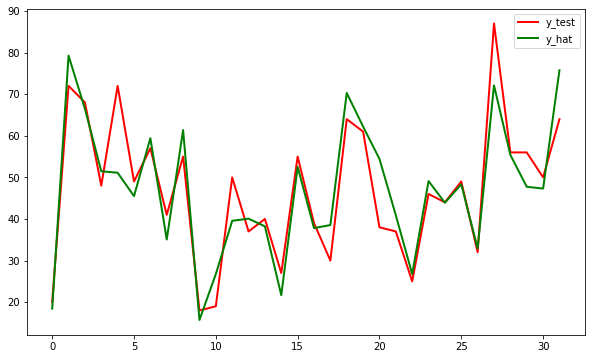

In [16]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(x_test))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [17]:
# 拟合优度R2的输出方法二
print("r2_score:",r2_score(y_test, y_hat)) 
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

r2_score: 0.8072533281432706
MAE: 5.262018943705062
MSE: 52.2456418234778
RMSE: 7.22811467974034
